<a href="https://colab.research.google.com/github/sskboonmee/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
pizza = pd.read_csv('/content/Pizza.csv' )   #\t+ คือการใช้ tab แบ่งข้อมูล \s+ คือใช้ space แบ่งข้อมูล
pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


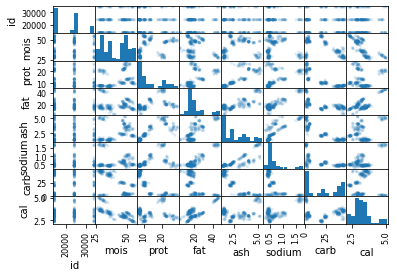

In [49]:
pd.plotting.scatter_matrix(pizza , alpha=0.15);

In [54]:
data_matrix = pizza.iloc[:,:]   #เป็นการแปลงข้อมูลในอยู่ในรูปเมทริกซ์และตัดหลัก'brand'เนื่องจากเป็นตัวแปรที่เป็น string
data_matrix

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [55]:
data_matrix = np.array(pizza.iloc[:,:])   #เปลี่ยนจากตารางมาเป็นเมทริกซ์ แต่ตารางนี้ยังไม่เป็น Column vector ยังไม่พร้อมทำงานต้องแปลงก่อนเพราะ dimension ยังไม่ตรงตามข้อกำหนด
data_matrix

array([[1.4069e+04, 2.7820e+01, 2.1430e+01, ..., 1.7700e+00, 7.7000e-01,
        4.9300e+00],
       [1.4053e+04, 2.8490e+01, 2.1260e+01, ..., 1.7900e+00, 1.0200e+00,
        4.8400e+00],
       [1.4025e+04, 2.8350e+01, 1.9990e+01, ..., 1.6300e+00, 8.0000e-01,
        4.9500e+00],
       ...,
       [3.4039e+04, 4.4550e+01, 1.1010e+01, ..., 6.4000e-01, 2.5980e+01,
        2.9200e+00],
       [1.4044e+04, 4.7600e+01, 1.0430e+01, ..., 5.6000e-01, 2.4470e+01,
        2.7600e+00],
       [1.4045e+04, 4.6840e+01, 9.9100e+00, ..., 5.7000e-01, 2.5480e+01,
        2.8100e+00]])

In [57]:
data_matrix = data_matrix.T    #แปลงให้ตรงตามข้อตกลงโดยการนำมาTranspose
print(data_matrix.shape)
data_matrix

(8, 300)


array([[1.4069e+04, 1.4053e+04, 1.4025e+04, ..., 3.4039e+04, 1.4044e+04,
        1.4045e+04],
       [2.7820e+01, 2.8490e+01, 2.8350e+01, ..., 4.4550e+01, 4.7600e+01,
        4.6840e+01],
       [2.1430e+01, 2.1260e+01, 1.9990e+01, ..., 1.1010e+01, 1.0430e+01,
        9.9100e+00],
       ...,
       [1.7700e+00, 1.7900e+00, 1.6300e+00, ..., 6.4000e-01, 5.6000e-01,
        5.7000e-01],
       [7.7000e-01, 1.0200e+00, 8.0000e-01, ..., 2.5980e+01, 2.4470e+01,
        2.5480e+01],
       [4.9300e+00, 4.8400e+00, 4.9500e+00, ..., 2.9200e+00, 2.7600e+00,
        2.8100e+00]])

## 1.Stadardizing the data

####Mean และ Standard Deviation ในแต่ละ Dimension

In [61]:
meanD = np.mean(data_matrix,axis=1)  #เป็นการหา mean ในแต่ละ dimensioin
meanD

array([2.08410400e+04, 4.09030667e+01, 1.33735667e+01, 2.02295333e+01,
       2.63323333e+00, 6.69400000e-01, 2.28647667e+01, 3.27100000e+00])

In [62]:
stdD = np.std(data_matrix,axis=1)  #เป็นการหา std ในแต่ละ Dimension
stdD

array([6.95130267e+03, 9.53705171e+00, 6.42365941e+00, 8.96068638e+00,
       1.26760557e+00, 3.69739963e-01, 1.79996478e+01, 6.19000000e-01])

####ปรับ ปรับ mean และ std ให้ มี mean=0 std=1

In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
data_std = StandardScaler().fit_transform(data_matrix)
data_std

array([[ 2.6457385 ,  2.64573887,  2.64573799, ...,  2.64574933,
         2.64573831,  2.6457385 ],
       [-0.37525664, -0.37510714, -0.37512998, ..., -0.37531981,
        -0.37088466, -0.37105082],
       [-0.37663146, -0.37666446, -0.3769343 , ..., -0.3783005 ,
        -0.37889585, -0.37900973],
       ...,
       [-0.38086136, -0.38085825, -0.3808969 , ..., -0.37922207,
        -0.38102312, -0.38102262],
       [-0.38107651, -0.38102411, -0.38107604, ..., -0.37697012,
        -0.37586983, -0.37565419],
       [-0.38018148, -0.38020129, -0.38018036, ..., -0.37901945,
        -0.38054896, -0.38053987]])

In [59]:
pizza_std = StandardScaler().fit_transform(pizza)
pizza_std

array([[-0.97421164, -1.37181459,  1.25418127, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-0.97651337, -1.30156227,  1.22771661, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-0.98054139, -1.31624186,  1.03000998, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 1.89863118,  0.3823963 , -0.36794707, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [-0.97780809,  0.70220164, -0.45823828, ..., -0.29588362,
         0.08918137, -0.82552504],
       [-0.97766423,  0.62251244, -0.53918903, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

## 2.Calculating covariance matrix


In [17]:
pizza_cov_matrix = np.cov(pizza_std.T)
pizza_cov_matrix

array([[ 1.00334448,  0.03270407, -0.07674126, -0.00487631, -0.03418551,
        -0.01520677,  0.0150162 , -0.02127955],
       [ 0.03270407,  1.00334448,  0.36145252, -0.17189118,  0.26644367,
        -0.10262097, -0.59378092, -0.7669972 ],
       [-0.07674126,  0.36145252,  1.00334448,  0.49966723,  0.82659903,
         0.43056473, -0.85639691,  0.07049308],
       [-0.00487631, -0.17189118,  0.49966723,  1.00334448,  0.79428157,
         0.93644671, -0.64237943,  0.76712418],
       [-0.03418551,  0.26644367,  0.82659903,  0.79428157,  1.00334448,
         0.8108249 , -0.90199502,  0.32756032],
       [-0.01520677, -0.10262097,  0.43056473,  0.93644671,  0.8108249 ,
         1.00334448, -0.6222505 ,  0.67420485],
       [ 0.0150162 , -0.59378092, -0.85639691, -0.64237943, -0.90199502,
        -0.6222505 ,  1.00334448, -0.02356313],
       [-0.02127955, -0.7669972 ,  0.07049308,  0.76712418,  0.32756032,
         0.67420485, -0.02356313,  1.00334448]])

## 3.Calculating Eigendecomposition

In [18]:
eigen_values, eigen_vectors = np.linalg.eig(pizza_cov_matrix)

In [19]:
eigen_values

array([4.18700019e+00, 2.29816159e+00, 1.01008238e+00, 4.08476497e-01,
       9.51047530e-02, 2.75822369e-02, 3.38672972e-04, 9.54086674e-06])

In [20]:
eigen_vectors

array([[ 1.99403012e-02,  5.81763147e-03,  9.93250052e-01,
         1.11331687e-01, -2.07984566e-02, -1.39813075e-02,
        -2.58398640e-04, -9.96706744e-05],
       [-6.44785509e-02,  6.28375256e-01,  4.89635165e-02,
        -4.17773426e-01,  2.22559480e-01, -4.55739129e-03,
        -4.46453904e-01,  4.18545592e-01],
       [-3.78951071e-01,  2.69609639e-01, -8.22473744e-02,
         7.40512315e-01,  8.86180970e-03, -3.89773631e-01,
         6.96421594e-05,  2.76733787e-01],
       [-4.46467403e-01, -2.34215299e-01,  4.52319845e-02,
        -1.93036121e-01,  5.06869519e-01,  1.75580059e-01,
         5.25427705e-01,  3.77732492e-01],
       [-4.71813825e-01,  1.11065055e-01,  3.45464203e-04,
         5.57179039e-02, -5.55431191e-01,  6.68467507e-01,
        -5.88126045e-02,  5.60368303e-02],
       [-4.35550982e-01, -2.01521828e-01,  4.33743722e-02,
        -4.56740689e-01, -4.41865186e-01, -6.03270611e-01,
        -3.21259514e-03, -5.55686523e-04],
       [ 4.24755778e-01, -3.204165

###Sorting Eigenvalues เรียงลำดับEigenvalues

In [23]:
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.187000186928664
2.2981615890404905
1.0100823765802145
0.40847649655832474
0.09510475299961943
0.0275822368967228
0.00033867297203837317
9.540866737356071e-06


##4.Calculating cumulative variance to select number of components

In [25]:
total = sum(eigen_values)
var_exp = [(i / total)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print("Cumulative variance captured as we travel with each component \n",cum_var_exp)

Variance captured by each component is 
 [52.163043995486255, 28.631263130129437, 12.583942941561835, 5.088936352955795, 1.1848467144535917, 0.3436287013383381, 0.004219300776644732, 0.00011886329810289436]
Cumulative variance captured as we travel with each component 
 [ 52.163044    80.79430713  93.37825007  98.46718642  99.65203313
  99.99566184  99.99988114 100.        ]


In [26]:
df1 = pd.read_csv('/content/Pizza.csv' )

### Scree plot for visualization

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(pizza_std)

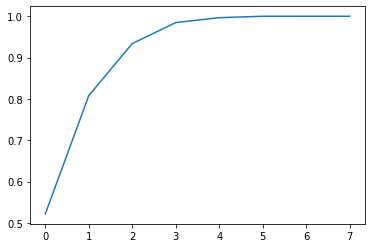

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Text(0.5, 0, 'No of components')

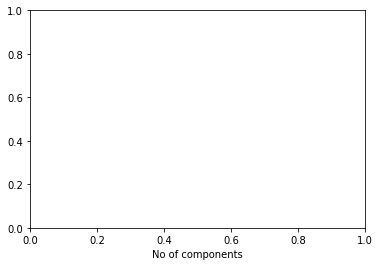

In [29]:
plt.xlabel('No of components')

Text(0, 0.5, 'Cumulative explained variance')

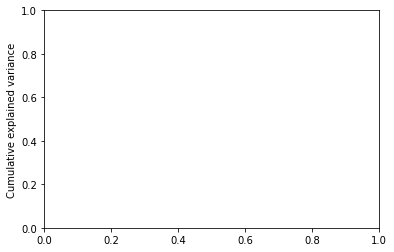

In [30]:
plt.ylabel('Cumulative explained variance')

In [31]:
plt.show()

##Creating 3 Principal components
#อาจจะเป็นขั้นที่ 5


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pcs = pca.fit_transform(pizza_std)
df_new = pd.DataFrame(data=pcs, columns={'PC1','PC2','PC3'})
df_new['target'] = df1['brand'] 
df_new.head()

,PC3,PC1,PC2,target
0,5.029003,2.683866,-0.854997,A
1,5.042441,2.533955,-0.854766,A
2,4.824210,2.678397,-0.851929,A
3,4.488378,2.289807,-0.861077,A
4,4.490815,2.163979,-0.882000,A


##5.ลองทำ

In [35]:
X = pizza_std.T
X.shape

(8, 300)

In [36]:
W = eigen_vectors
W.shape

(8, 8)

In [37]:
X_pca = X.T.dot(W)
X_pca

array([[-5.02900280e+00, -2.68386611e+00, -8.54997159e-01, ...,
        -2.72015628e-01, -2.15043471e-03, -8.87604510e-04],
       [-5.04244094e+00, -2.53395472e+00, -8.54765928e-01, ...,
        -2.03907712e-01,  3.14142925e-03, -9.48594141e-04],
       [-4.82420967e+00, -2.67839730e+00, -8.51929364e-01, ...,
         4.81877869e-02,  5.66902401e-03, -7.36755891e-04],
       ...,
       [ 6.84309556e-01,  5.26406531e-01,  1.90565247e+00, ...,
        -7.00034660e-02,  1.62011540e-03, -4.27765658e-04],
       [ 8.45645826e-01,  9.16013392e-01, -9.40926638e-01, ...,
         3.89342509e-02,  2.09669775e-03, -5.72439458e-05],
       [ 8.76434629e-01,  7.62107077e-01, -9.36153404e-01, ...,
         4.11408686e-02,  3.78082371e-04, -3.18482559e-05]])

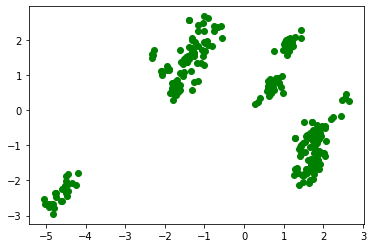

In [38]:
plt.plot(X_pca[:,0],X_pca[:,1],'og')

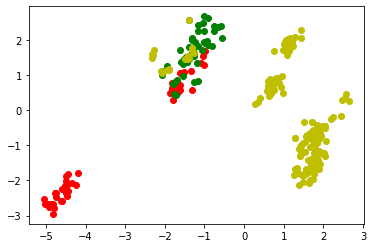

In [39]:
plt.plot(X_pca[:50,0],X_pca[:50,1],'or')
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og')
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)

In [42]:
new_pca = pca.fit_transform(X.T)  

In [43]:
new_pca

array([[ 5.0290028 ,  2.68386611],
       [ 5.04244094,  2.53395472],
       [ 4.82420967,  2.6783973 ],
       [ 4.48837805,  2.28980665],
       [ 4.49081489,  2.16397853],
       [ 4.52344664,  2.17269405],
       [ 4.33407039,  2.0618309 ],
       [ 4.77649526,  2.35779008],
       [ 4.87313234,  2.68583731],
       [ 4.93490999,  2.6631364 ],
       [ 4.85961394,  2.74127288],
       [ 4.90997356,  2.74715951],
       [ 4.62917337,  2.58388402],
       [ 4.43995758,  2.2963552 ],
       [ 4.45698403,  2.12932739],
       [ 4.74336782,  2.46339225],
       [ 4.4350204 ,  1.82471605],
       [ 4.19176445,  1.79778512],
       [ 4.48677412,  1.88240842],
       [ 4.597434  ,  2.23136564],
       [ 4.81868337,  2.9542827 ],
       [ 4.78406988,  2.77466827],
       [ 4.50815059,  2.15874479],
       [ 4.24377553,  2.12077607],
       [ 4.47945501,  2.0142427 ],
       [ 4.50303616,  2.36809563],
       [ 4.59559423,  2.59780928],
       [ 4.45851755,  2.43019105],
       [ 4.74014015,

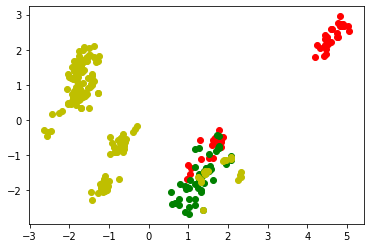

In [44]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')